## 2. Experimentation on a simple Machine Learning algorithm

The **k-nearest neighbour** is one of the simplest algorithm used in Machine Learning. This algorithm classifies objects based on **features**. In Machine Learning, a **feature** is an individual measurable property or characteristic of a phaenomenon being observed.

Assuming that we want to develop a program to identify whether a person is a ballet dancer or a rugby player, which of the following features you consider distinguishing? Run the following cell and select the answer.

In [1]:
from Widget import *
from getFeedbackOnFeatureSelection import *
from IPython.display import *

#Widget generator - please don't change
newWidget = Widget (['Height', 'Weight', 'Age', 'Sex', 'Name'], 'Features')
newWidget.createSelectMultiple()
newWidget.displayWidget()

#Generate the feedback - please don't change the code

feedbackQ1 = getFeedbackOnFeatureSelection(newWidget)
feedbackQ1.createButton("Get feedback")
feedbackQ1.displayButton()

def on_button_clicked(b):
    clear_output()
    feedbackQ1.printFeedback(newWidget)
feedbackQ1.button.on_click(on_button_clicked)

SelectMultiple(description='Features', options=('Height', 'Weight', 'Age', 'Sex', 'Name'), value=())

Button(description='Get feedback', style=ButtonStyle())

In our analysis, consider the data sets below collected from a sample of ballet dancer and rugby players. In this table, we will represent **males** as 0 and **females** as 1.

|Person|Sex (0/1)|Age |Weight (Kg)|Height (cm)|
|------|---------|----|-----------|-----------|
|     1|        1|  24|         63|        190|
|     2|        1|  20|         55|        185|
|     3|        1|  25|         75|        202|
|     4|        1|  30|         50|        180|
|     5|        1|  19|         57|        174|
|     6|        0|  31|         66|        174|
|     7|        0|  31|         85|        150|
|     8|        1|  28|         93|        145|
|     9|        0|  29|         75|        130|
|    10|        0|  24|         99|        163|
|    11|        0|  30|        100|        171|
|    12|        1|  25|         84|        168|

Now, let's represent these values in 2-dimentional spaces taking different groups of 2 features into consideration. Please execute the code below to see how **weight** and **age** data is distributed in a 2 dimentional space.

In [10]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

#Collect the weights and ages from the table
weights = [63, 55, 75, 50, 57, 66, 85, 93, 75, 99, 100, 84]
ages = [24, 20, 25, 30, 19, 31, 31, 28, 29, 24, 30, 25]

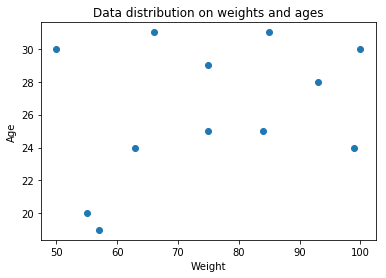

In [11]:
#Plot the graph
plt.scatter(weights,ages)
plt.title("Data distribution on weights and ages")
plt.xlabel("Weight")
plt.ylabel("Age")
plt.show()

It seems that from the graphic above it's impossible to identify **clusters**. This is because the age is not a distinguishing element that could separate rugby players and ballet dancers. Let's see how it works with **heights** and **weights**.

In [12]:
#Collect the heights and weights from the table
heights = [190, 185, 202, 180, 174, 174, 150, 145, 130, 163, 171, 168]
weights = [63, 55, 75, 50, 57, 66, 85, 93, 75, 99, 100, 84]

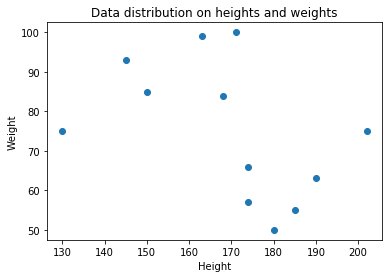

In [13]:
#Plot the graph
plt.scatter(heights,weights)
plt.title("Data distribution on heights and weights")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

By choosing the **heights** and **weights** features to clasify these examples, two clusters of data can be distinguished: *top-left* and *bottom-right*. 

In your opinion, which one of these represents the rugby players? Execute the code below and choose your answer.

In [14]:
#Create the selection box - please don't change
from getFeedbackOnClusters import *

clusterWidget = Widget (['Top-left', 'Bottom-right'], 'Clusters')
clusterWidget.createSelectSingle()
clusterWidget.displayWidget()

#Create the feedback button - don't change the code
feedbackQ2 = getFeedbackOnClusters(clusterWidget)
feedbackQ2.createButton("Get feedback")
feedbackQ2.displayButton()

def on_button_clicked(b):
    clear_output()
    feedbackQ2.printFeedback(clusterWidget)
feedbackQ2.button.on_click(on_button_clicked)

Select(description='Clusters', options=('Top-left', 'Bottom-right'), value='Top-left')

Button(description='Get feedback', style=ButtonStyle())

Now that we clearly identified  2 data clusters (i.e. ballet dancers and rugby players), we can introduce our own data and predict whether our example is a rugby player or a ballet dancer. The data will be classified by the aid of the **k-nearest algorithm** which is designed (as the name suggests), to identify which class the new objects belongs to depending on the closests **k** neighbours. In this case, to calculate the distance between the input point and its neighbours, we'll use the **Pythagorean formula** : $$d = \sqrt{(x_{2} - x_{1})^2 + (y_{2}-y_{1})^2}$$

For now, let's preapare the data from the graph into a matrix that can be processed by the algorithm. Execute the cell below.

In [15]:
featuresMatrix = np.c_[transpose(heights), transpose(weights)]
labelsMatrix = transpose([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])
trainingMatrix = np.c_[featuresMatrix, labelsMatrix]
print (trainingMatrix)

[[190  63   1]
 [185  55   1]
 [202  75   1]
 [180  50   1]
 [174  57   1]
 [174  66   1]
 [150  85   0]
 [145  93   0]
 [130  75   0]
 [163  99   0]
 [171 100   0]
 [168  84   0]]


Next, replace the words in the code below to introduce your testing point containing the height and weight of a famouse rugby player or ballet dancer.

In [ ]:
#replace the ? below with your own testing value and run the code
import math

distances = np.empty([0,2])

height = ?
weight = ?

testingPoint = [height, weight]

#calculate the distances
for trainingPoint in trainingMatrix:
    trainingPoint[0]
    distance = math.sqrt((trainingPoint[0] - height)**2 + (trainingPoint[1] - weight)**2)
    distances = np.vstack([distances, [distance, trainingPoint[2]]])

#sort the distances    
distances = distances[distances[:,0].argsort()]

classOne = 0
classTwo = 0

for i in range(0,5):
    if distances[i][1] == 1:
        classOne = classOne + 1
    else:
        classTwo = classTwo + 1

if classOne > classTwo:
    print("Ballet dancer")
else:
        print("Rugby player")